In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import timeit

from QuantumWalk.State import State
from QuantumWalk.Operator import Operator
from QuantumWalk.QuantumWalk import QuantumWalk
from QuantumWalk.ProbabilityDistribution import ProbabilityDistribution
from QuantumWalk.QuantumWalkDao import QuantumWalkDao

# Cycle Graph Explicit

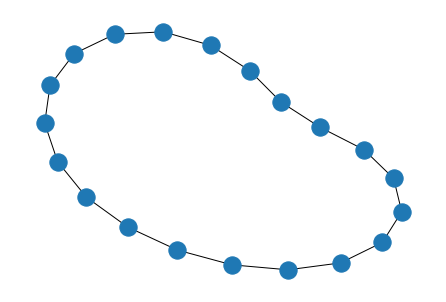

In [17]:
nx.draw(nx.cycle_graph(20))

In [18]:
# ------ Initial Conditions ------ #
n = 1000
t=600
gamma=1/(2*np.sqrt(2))
marked = [int(n/2)]

# ------ Initial State ------ #
initState = State(n,marked)
initState.timedBuildState()
print("\nN=%s\tTime=%s\tGamma=%s\t"%(n,t,round(gamma,2)))

State took 1.1680999705276918e-05 seconds.

N=1000	Time=600	Gamma=0.35	


In [19]:
# ------ NetworkX Graph  ------ #
startTimeGraph = timeit.default_timer()
graph2 = nx.cycle_graph(n)
endTimeGraph = timeit.default_timer()

executionTimeGraph = (endTimeGraph - startTimeGraph)
print("Graph took %s seconds." % executionTimeGraph)

Graph took 0.0048734670003796055 seconds.


In [20]:
# ------ Diagonal version of evolution operator------ #
op = Operator(graph2,t,gamma)
op.timedBuildDiagonalOperator()

Diagonal operator took 8.292393303000154 seconds.


In [21]:
# ------ Amplitudes of Final State ------ #
walk = QuantumWalk(initState,op)
walk.timedBuildWalk()
finalState = walk.getWalk()

Walk took 0.0035642299999381066 seconds.


In [22]:
# ------ Probabilities of Final State ------ #
probDist = ProbabilityDistribution(finalState)
probDist.timedBuildProbDist()
probabilities = probDist.getProbDist()

ProbDist took 0.04279258099995786 seconds.


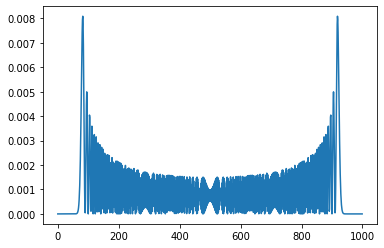

In [23]:
plt.plot(probabilities)

# Cycle Graph With Controller

In [59]:
# ------ Initial Conditions ------ #
n = 1000
t = 600
gamma = 1 / (2 * np.sqrt(2))
marked = [int(n / 2)]
graph = nx.cycle_graph(n)

In [60]:
qwController = QuantumWalkDao(n,graph,t,gamma,marked)

State took 2.5860999812721275e-05 seconds.
Diagonal operator took 7.908508389000417 seconds.
Walk took 0.0026894289994743303 seconds.
ProbDist took 0.025561172000379884 seconds.


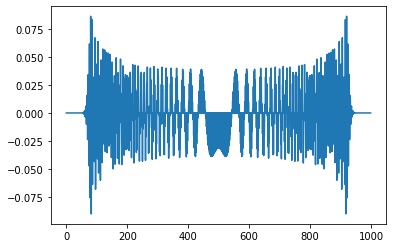

In [66]:
qwAmplitudes = qwController.getWalk()
plt.plot(qwAmplitudes.getStateVec())

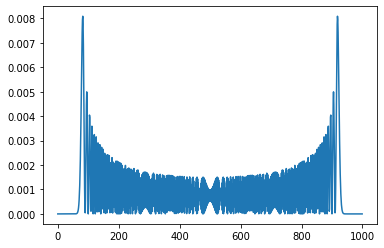

In [68]:
qwProbabilities = qwController.getProbDist()
plt.plot(qwProbabilities)

# More Explicit Examples

# Complete Graph

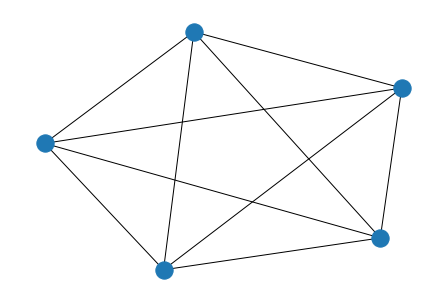

In [15]:
nx.draw(nx.complete_graph(5))

In [34]:
n = 1000
t=600
gamma=1/(2*np.sqrt(2))
marked = [int(n/4),int(n/2),int(n/2)+int(n/4)]

initState = State(n,marked)
initState.timedBuildState()
print("N=%s\tTime=%s\tGamma=%s\t"%(n,t,round(gamma,2)))

State took 4.848099888477009e-05 seconds.
N=1000	Time=600	Gamma=0.35	


In [17]:
startTimeGraph = timeit.default_timer()
graph2 = nx.complete_graph(n)
endTimeGraph = timeit.default_timer()

executionTimeGraph = (endTimeGraph - startTimeGraph)
print("Graph took %s seconds." % executionTimeGraph)

Graph took 0.7321449749997555 seconds.


In [18]:
op = Operator(graph2,t,gamma)
op.timedBuildDiagonalOperator()

Diagonal operator took 7.946728227000676 seconds.


In [20]:
walk = QuantumWalk(initState,op)
walk.timedBuildWalk()

Walk took 0.007205273999716155 seconds.


In [21]:
probDist = ProbabilityDistribution(walk.getWalk())
probDist.timedBuildProbDist()

ProbDist took 0.09181727700070041 seconds.


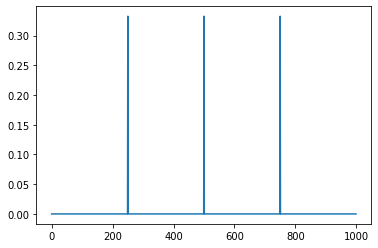

In [22]:
plt.plot(probDist.getProbDist())

# 2D Graphs

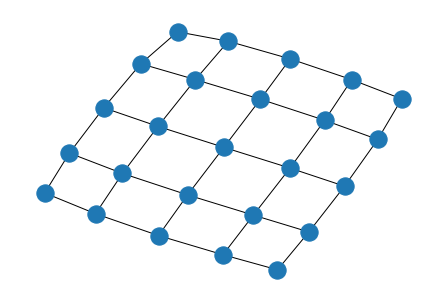

In [3]:
nx.draw(nx.grid_2d_graph(5, 5))

In [16]:
n = 10
m = 100
t= 20
gamma=1/(2*np.sqrt(2))
marked = [int(n/2)]

initState = State(n*m,marked)
initState.timedBuildState()
print("N=%s\tTime=%s\tGamma=%s\t"%(n,t,round(gamma,2)))

State took 1.4100000043981709e-05 seconds.
N=10	Time=20	Gamma=0.35	


In [17]:
startTimeGraph = timeit.default_timer()
graph2 = nx.grid_2d_graph(n, m)
endTimeGraph = timeit.default_timer()

executionTimeGraph = (endTimeGraph - startTimeGraph)
print("Graph took %s seconds." % executionTimeGraph)

Graph took 0.001970400000573136 seconds.


In [18]:
op = Operator(graph2,t,gamma)
op.timedBuildDiagonalOperator()

Diagonal operator took 0.3359830999997939 seconds.


In [19]:
walk = QuantumWalk(initState,op)
walk.timedBuildWalk()

Walk took 0.0009206999984598951 seconds.


In [20]:
probDist = ProbabilityDistribution(walk.getWalk())
probDist.timedBuildProbDist()

ProbDist took 0.01028299999961746 seconds.


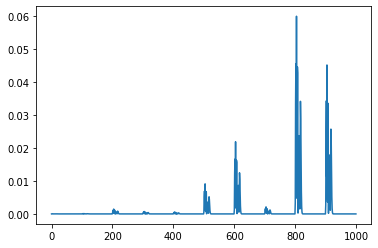

In [21]:
plt.plot(probDist.getProbDist())

# Balanced Tree

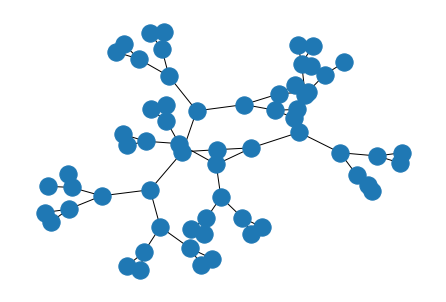

In [40]:
nx.draw(nx.balanced_tree(2, 5))

In [90]:
n = 9
r = 2
t= 500
gamma=1/(2*np.sqrt(2))

In [91]:
startTimeGraph = timeit.default_timer()
graph2 =nx.balanced_tree(r, n)
endTimeGraph = timeit.default_timer()

executionTimeGraph = (endTimeGraph - startTimeGraph)
print("Graph took %s seconds." % executionTimeGraph)

Graph took 0.006170108999867807 seconds.


In [92]:
n = len(graph2)
initState = State(n,[int(n/2)])
initState.timedBuildState()
print("N=%s\tTime=%s\tGamma=%s\t"%(len(graph2),t,round(gamma,2)))

State took 4.798000009031966e-05 seconds.
N=1023	Time=500	Gamma=0.35	


In [93]:
op = Operator(graph2,t,gamma)
op.timedBuildDiagonalOperator()

Diagonal operator took 8.177313311000034 seconds.


In [94]:
walk = QuantumWalk(initState,op)
walk.timedBuildWalk()

Walk took 0.005100155000036466 seconds.


In [95]:
probDist = ProbabilityDistribution(walk.getWalk())
probDist.timedBuildProbDist()

ProbDist took 0.04574518600020383 seconds.


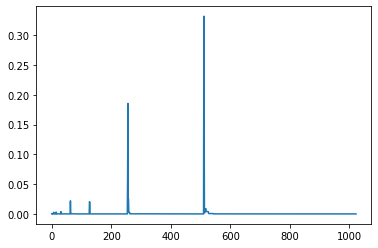

In [96]:
plt.plot(probDist.getProbDist())

# Barbell Graph

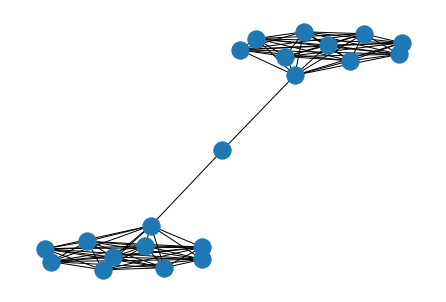

In [22]:
nx.draw(nx.barbell_graph(10,1))

In [61]:
m1 = 500
m2 = 1
t= 500
gamma=1/(2*np.sqrt(2))

In [62]:
startTimeGraph = timeit.default_timer()
graph2 =nx.barbell_graph(m1, m2)
endTimeGraph = timeit.default_timer()

executionTimeGraph = (endTimeGraph - startTimeGraph)
print("Graph took %s seconds." % executionTimeGraph)

Graph took 0.40258251799969 seconds.


In [63]:
n = len(graph2)
initState = State(n,[int(n/4),int(n/2),int(n/2)+int(n/4)])
initState.timedBuildState()
print("N=%s\tTime=%s\tGamma=%s\t"%(len(graph2),t,round(gamma,2)))

State took 3.235700023651589e-05 seconds.
N=1001	Time=500	Gamma=0.35	


In [64]:
op = Operator(graph2,t,gamma)
op.timedBuildDiagonalOperator()

Diagonal operator took 7.528047177998815 seconds.


In [65]:
walk = QuantumWalk(initState,op)
walk.timedBuildWalk()

Walk took 0.003337751999424654 seconds.


In [66]:
probDist = ProbabilityDistribution(walk.getWalk())
probDist.timedBuildProbDist()

ProbDist took 0.04231773899846303 seconds.


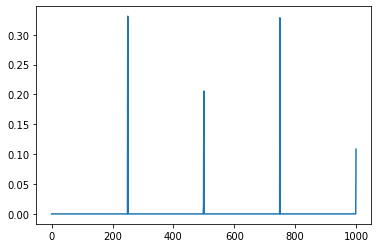

In [67]:
plt.plot(probDist.getProbDist())

# Binomal Tree

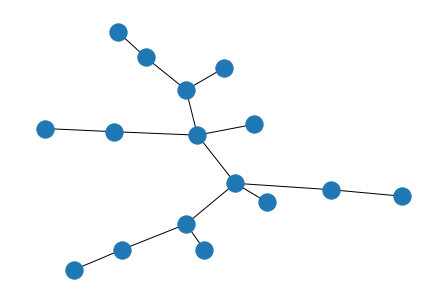

In [72]:
nx.draw(nx.binomial_tree(4))

In [83]:
k=10
t= 500
gamma=1/(2*np.sqrt(2))

In [84]:
startTimeGraph = timeit.default_timer()
graph2 =nx.barbell_graph(m1, m2)
endTimeGraph = timeit.default_timer()

executionTimeGraph = (endTimeGraph - startTimeGraph)
print("Graph took %s seconds." % executionTimeGraph)

Graph took 0.4071604460004892 seconds.


In [85]:
n = len(graph2)
initState = State(n,[int(n/2)])
initState.timedBuildState()
print("N=%s\tTime=%s\tGamma=%s\t"%(len(graph2),t,round(gamma,2)))

State took 3.810599991993513e-05 seconds.
N=1001	Time=500	Gamma=0.35	


In [86]:
op = Operator(graph2,t,gamma)
op.timedBuildDiagonalOperator()

Diagonal operator took 7.199375746000442 seconds.


In [87]:
walk = QuantumWalk(initState,op)
walk.timedBuildWalk()

Walk took 0.006813596999563742 seconds.


In [88]:
probDist = ProbabilityDistribution(walk.getWalk())
probDist.timedBuildProbDist()

ProbDist took 0.04665834900151822 seconds.


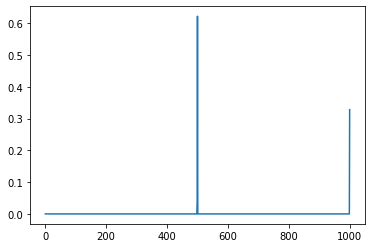

In [89]:
plt.plot(probDist.getProbDist())

# Ladder Graph - Interesting Probability Distribution

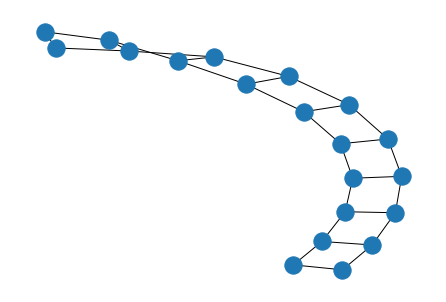

In [224]:
nx.draw(nx.ladder_graph(10))

In [232]:
n = 500
t= 60
gamma=1/(2*np.sqrt(2))

In [233]:
startTimeGraph = timeit.default_timer()
graph2 =nx.circular_ladder_graph(n)
endTimeGraph = timeit.default_timer()

executionTimeGraph = (endTimeGraph - startTimeGraph)
print("Graph took %s seconds." % executionTimeGraph)

Graph took 0.010744106999482028 seconds.


In [234]:
n = len(graph2)
initState = State(n,[int(n/2)])
initState.timedBuildState()
print("N=%s\tTime=%s\tGamma=%s\t"%(len(graph2),t,round(gamma,2)))

State took 4.86210010421928e-05 seconds.
N=1000	Time=60	Gamma=0.35	


In [235]:
op = Operator(graph2,t,gamma)
op.timedBuildDiagonalOperator()

Diagonal operator took 7.171680966999702 seconds.


In [236]:
walk = QuantumWalk(initState,op)
walk.timedBuildWalk()

Walk took 0.0034253029989486095 seconds.


In [237]:
probDist = ProbabilityDistribution(walk.getWalk())
probDist.timedBuildProbDist()

ProbDist took 0.04291368099984538 seconds.


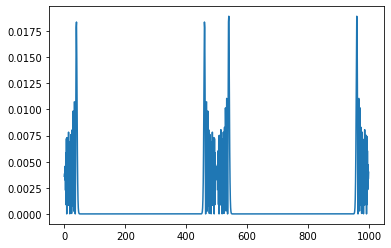

In [238]:
plt.plot(probDist.getProbDist())

# Circular Ladder Graph - Interesting Probability Distribution

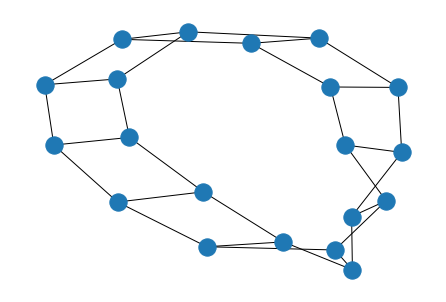

In [105]:
nx.draw(nx.circular_ladder_graph(10))

In [146]:
n = 500
t= 60
gamma=1/(2*np.sqrt(2))

In [147]:
startTimeGraph = timeit.default_timer()
graph2 =nx.circular_ladder_graph(n)
endTimeGraph = timeit.default_timer()

executionTimeGraph = (endTimeGraph - startTimeGraph)
print("Graph took %s seconds." % executionTimeGraph)

Graph took 0.00301099300122587 seconds.


In [148]:
n = len(graph2)
initState = State(n,[int(n/2)])
initState.timedBuildState()
print("N=%s\tTime=%s\tGamma=%s\t"%(len(graph2),t,round(gamma,2)))

State took 5.0135000492446125e-05 seconds.
N=1000	Time=60	Gamma=0.35	


In [149]:
op = Operator(graph2,t,gamma)
op.timedBuildDiagonalOperator()

Diagonal operator took 7.139227333000235 seconds.


In [150]:
walk = QuantumWalk(initState,op)
walk.timedBuildWalk()

Walk took 0.0033464560001448262 seconds.


In [151]:
probDist = ProbabilityDistribution(walk.getWalk())
probDist.timedBuildProbDist()

ProbDist took 0.04682202900039556 seconds.


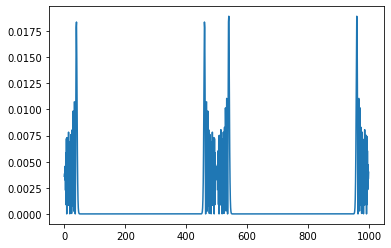

In [152]:
plt.plot(probDist.getProbDist())

# Dorogovtsev-Goltsev-Mendes graph

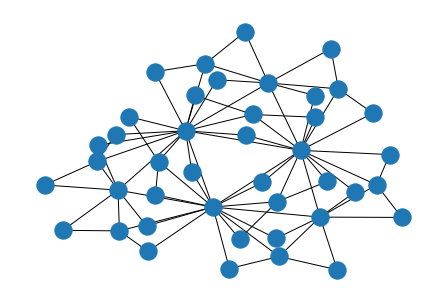

In [164]:
nx.draw(nx.dorogovtsev_goltsev_mendes_graph(4))

In [178]:
k = 7
t= 60
gamma=1/(2*np.sqrt(2))

In [179]:
startTimeGraph = timeit.default_timer()
graph2 =nx.dorogovtsev_goltsev_mendes_graph(k)
endTimeGraph = timeit.default_timer()

executionTimeGraph = (endTimeGraph - startTimeGraph)
print("Graph took %s seconds." % executionTimeGraph)

Graph took 0.0095892110002751 seconds.


In [180]:
n = len(graph2)
initState = State(n,[int(n/2)])
initState.timedBuildState()
print("N=%s\tTime=%s\tGamma=%s\t"%(len(graph2),t,round(gamma,2)))

State took 5.346999932953622e-05 seconds.
N=1095	Time=60	Gamma=0.35	


In [181]:
op = Operator(graph2,t,gamma)
op.timedBuildDiagonalOperator()

Diagonal operator took 10.158592151999983 seconds.


In [182]:
walk = QuantumWalk(initState,op)
walk.timedBuildWalk()

Walk took 0.004006757000752259 seconds.


In [183]:
probDist = ProbabilityDistribution(walk.getWalk())
probDist.timedBuildProbDist()

ProbDist took 0.046587034999902244 seconds.


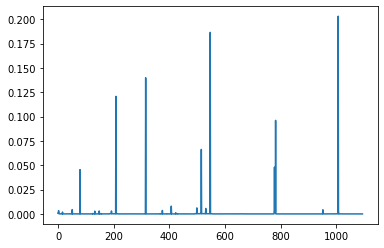

In [184]:
plt.plot(probDist.getProbDist())

# Full Rary Tree

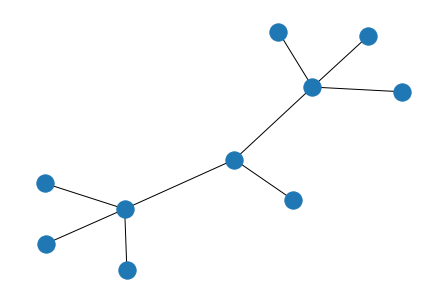

In [206]:
nx.draw(nx.full_rary_tree(3,10))

In [216]:
r = 3
n = 1000
t= 100
gamma=1/(2*np.sqrt(2))

In [217]:
startTimeGraph = timeit.default_timer()
graph2 =nx.full_rary_tree(r,n)
endTimeGraph = timeit.default_timer()

executionTimeGraph = (endTimeGraph - startTimeGraph)
print("Graph took %s seconds." % executionTimeGraph)

Graph took 0.007728605000011157 seconds.


In [218]:
n = len(graph2)
initState = State(n,[int(n/2)])
initState.timedBuildState()
print("N=%s\tTime=%s\tGamma=%s\t"%(len(graph2),t,round(gamma,2)))

State took 4.888500006927643e-05 seconds.
N=1000	Time=100	Gamma=0.35	


In [219]:
op = Operator(graph2,t,gamma)
op.timedBuildDiagonalOperator()

Diagonal operator took 7.160467585001243 seconds.


In [220]:
walk = QuantumWalk(initState,op)
walk.timedBuildWalk()

Walk took 0.0032907699987845263 seconds.


In [221]:
probDist = ProbabilityDistribution(walk.getWalk())
probDist.timedBuildProbDist()

ProbDist took 0.060161739000250236 seconds.


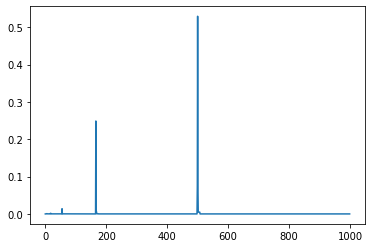

In [222]:
plt.plot(probDist.getProbDist())

# Hexagonal lattice graph

880


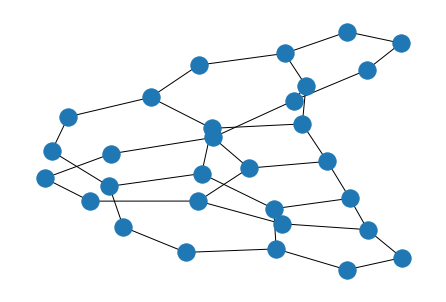

In [268]:
nx.draw(nx.hexagonal_lattice_graph(3,3))
print(len(nx.hexagonal_lattice_graph(20,20)))

In [295]:
m = 20
n = 20
t= 15
gamma=1/(2*np.sqrt(2))

In [296]:
startTimeGraph = timeit.default_timer()
graph2 =nx.hexagonal_lattice_graph(m,n)
endTimeGraph = timeit.default_timer()

executionTimeGraph = (endTimeGraph - startTimeGraph)
print("Graph took %s seconds." % executionTimeGraph)

Graph took 0.014477275999524863 seconds.


In [297]:
n = len(graph2)
initState = State(n,[int(n/2),int(n/2)+1])
initState.timedBuildState()
print("N=%s\tTime=%s\tGamma=%s\t"%(len(graph2),t,round(gamma,2)))

State took 6.108299930929206e-05 seconds.
N=880	Time=15	Gamma=0.35	


In [298]:
op = Operator(graph2,t,gamma)
op.timedBuildDiagonalOperator()

Diagonal operator took 5.226147663001029 seconds.


In [299]:
walk = QuantumWalk(initState,op)
walk.timedBuildWalk()

Walk took 0.003542226000718074 seconds.


In [300]:
probDist = ProbabilityDistribution(walk.getWalk())
probDist.timedBuildProbDist()

ProbDist took 0.043684437001502374 seconds.


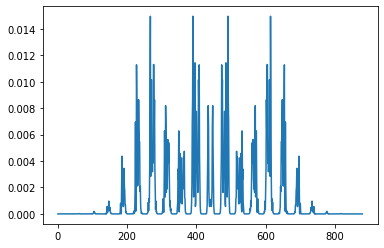

In [301]:
plt.plot(probDist.getProbDist())

# Hypercube graph

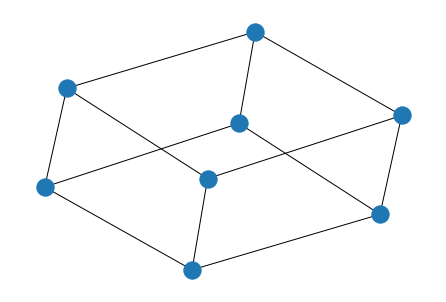

In [25]:
nx.draw(nx.hypercube_graph(3))

In [54]:
k = 7
t= 2
gamma=1/(2*np.sqrt(2))

In [55]:
startTimeGraph = timeit.default_timer()
graph2 =nx.hypercube_graph(k)
endTimeGraph = timeit.default_timer()

executionTimeGraph = (endTimeGraph - startTimeGraph)
print("Graph took %s seconds." % executionTimeGraph)

Graph took 0.00394360000063898 seconds.


In [56]:
n = len(graph2)
initState = State(n,[0])
initState.timedBuildState()
print("N=%s\tTime=%s\tGamma=%s\t"%(len(graph2),t,round(gamma,2)))

State took 3.459999970800709e-05 seconds.
N=128	Time=2	Gamma=0.35	


In [57]:
op = Operator(graph2,t,gamma)
op.timedBuildDiagonalOperator()

Diagonal operator took 0.0074201999996148515 seconds.


In [58]:
walk = QuantumWalk(initState,op)
walk.timedBuildWalk()

Walk took 0.00018039999849861488 seconds.


In [59]:
probDist = ProbabilityDistribution(walk.getWalk())
probDist.timedBuildProbDist()

ProbDist took 0.0013961999993625795 seconds.


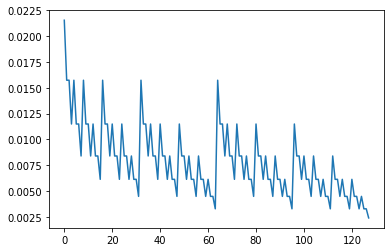

In [60]:
plt.plot(probDist.getProbDist())